# Logistics Regression

## Linearly seprable or non-linearly seprable datset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db_df = pd.read_csv("./diabetes.csv")
db_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = db_df.iloc[:,0:2]
Y = db_df.iloc[:,-1].to_numpy().reshape(-1,1)
X.shape, Y.shape

((768, 2), (768, 1))

In [14]:
neg_dp = db_df[db_df['Outcome'] == 0]
pos_dp = db_df[db_df['Outcome'] == 1]
neg_dp.shape, pos_dp.shape


((500, 9), (268, 9))

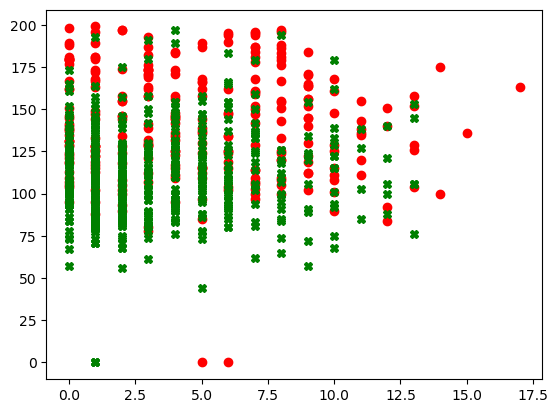

In [17]:
plt.plot(pos_dp["Pregnancies"], pos_dp["Glucose"], "ro", label="Data Points")
plt.plot(neg_dp["Pregnancies"], neg_dp["Glucose"], "gX", label="Data Points")

plt.show()

# this is non linear;y seprable data

## Linear seprable dataset (step function)

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a linearly separable dataset
X, y = make_classification(n_samples=100,    # Number of samples
                            n_features=2,    # Number of features (2D)
                            n_informative=2, # Both features contribute to the output
                            n_redundant=0,   # No redundant features
                            n_clusters_per_class=1,  # One cluster per class
                            flip_y=0,        # No noise
                            random_state=42)
X.shape, y.shape

((100, 2), (100,))

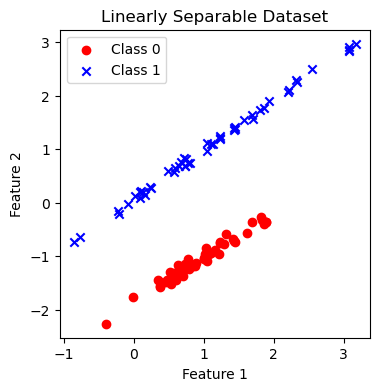

In [134]:
# Plot the dataset
plt.figure(figsize=(4, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', marker='x')
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [135]:
X.shape, y.shape
def step(z):
    return 1 if z > 0 else 0
def perceptron(X,y):
    X = np.insert(X,0,1, axis = 1)
    w = np.ones(X.shape[1])
    lr = 0.1
    for i in range(1000):
        j = np.random.randint(0,100)
        y_pred = step(np.dot(X[j], w))
        w = w + lr * (y[j] - y_pred) * X[j]

    return w

In [136]:
afterW = perceptron(X,y)
# afterW = fit(X,y)

print(afterW[0])
# Create linearly spaced points for cgpa (line_X1) and iq (line_X2)
line_X1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
line_X2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
Y = afterW[0] + afterW[1] * line_X1 + afterW[2] * line_X2

0.7000000000000001


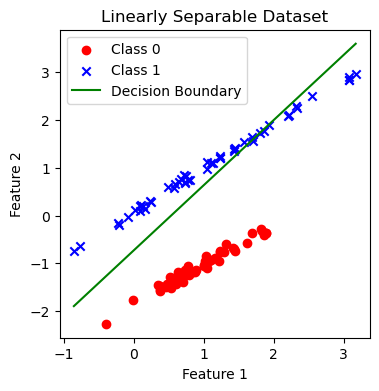

In [137]:
# Plot the dataset
plt.figure(figsize=(4, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', marker='x')

plt.plot(line_X1, Y, "g-", label="Decision Boundary")

plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [138]:
import pandas as pd
data = {'cgpa': [7.5, 8.9, 7.0], 'iq': [81,109,81], 'placed': [1,1,0]}
db_df = pd.DataFrame(data)
db_df.head()

,cgpa,iq,placed
0,7.5,81,1
1,8.9,109,1
2,7.0,81,0


In [5]:
neg_class = db_df[db_df["placed"] == 0]
pos_class = db_df[db_df["placed"] == 1]
neg_class.shape, pos_class.shape

((1, 3), (2, 3))

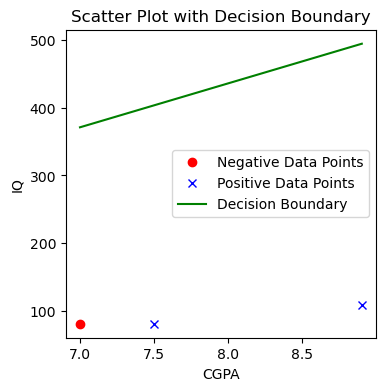

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming db_df, pos_class, and neg_class DataFrames are already defined
# Also assuming w0, w1, w2 have been defined for the linear model.

# Create linearly spaced points for cgpa (line_X1) and iq (line_X2)
line_X1 = np.linspace(db_df["cgpa"].min(), db_df["cgpa"].max(), 100)
line_X2 = np.linspace(db_df["iq"].min(), db_df["iq"].max(), 100)

# Calculate Y using the linear equation
w0 = 5
w1 = 6
w2 = 4
Y = w0 + w1 * line_X1 + w2 * line_X2

# Plot the negative class (red points) and positive class (blue points)
plt.figure(figsize=(4, 4))
plt.plot(neg_class["cgpa"], neg_class["iq"], "ro", label="Negative Data Points")
plt.plot(pos_class["cgpa"], pos_class["iq"], "bx", label="Positive Data Points")

# Draw the decision boundary line (using line_X1 and line_X2)
plt.plot(line_X1, Y, "g-", label="Decision Boundary")

# Add labels, title, and legend
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Scatter Plot with Decision Boundary")
plt.legend()

# Show the plot
plt.show()


In [8]:
db_df
X = db_df.iloc[:,:-1]
y = db_df.iloc[:,-1].to_numpy().reshape(-1,1)
X.shape, y.shape

((3, 2), (3, 1))

In [139]:
X.shape, y.shape
def step(z):
    return 1 if z > 0 else 0
def perceptron(X,y):
    X = np.insert(X,0,1, axis = 1)
    w = np.ones(X.shape[1]).reshape(-1,1)
    print(X.shape, w.shape, X[2])
    lr = 0.1
    for i in range(1000):
        j = np.random.randint(0,X.shape[0])
        y_pred = step(np.dot(X[j], w))
        w = w + lr * (y[j] - y_pred) * X[j]

    return w

after = perceptron(X,y)
print(after)

(100, 3) (3, 1) [1.         2.54881729 2.50225822]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

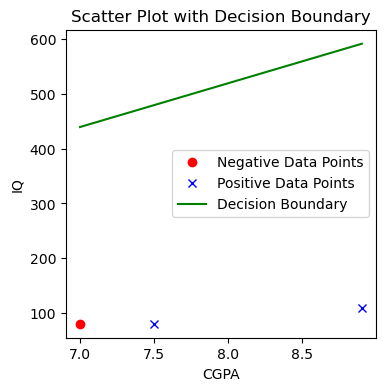

In [140]:
# draw a line
# Assuming db_df, pos_class, and neg_class DataFrames are already defined
# Also assuming w0, w1, w2 have been defined for the linear model.

# Create linearly spaced points for cgpa (line_X1) and iq (line_X2)
line_X1 = np.linspace(db_df["cgpa"].min(), db_df["cgpa"].max(), 100)
line_X2 = np.linspace(db_df["iq"].min(), db_df["iq"].max(), 100)

# Calculate Y using the linear equation
w0 = after[0]
w1 = after[1]
w2 = after[2]
# print(w0, w1, w2)
Y = w0 + w1 * line_X1 + w2 * line_X2

plt.figure(figsize=(4, 4))
plt.plot(neg_class["cgpa"], neg_class["iq"], "ro", label="Negative Data Points")
plt.plot(pos_class["cgpa"], pos_class["iq"], "bx", label="Positive Data Points")

# Draw the decision boundary line (using line_X1 and line_X2)
plt.plot(line_X1, Y, "g-", label="Decision Boundary")

# Add labels, title, and legend
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Scatter Plot with Decision Boundary")
plt.legend()

# Show the plot
plt.show()



## Sigmoid function (replacing the step function)

In [198]:
import pandas as pd
data = {'cgpa': [7.5, 8.9, 7.0], 'iq': [81,109,81], 'placed': [1,1,0]}
db_df = pd.DataFrame(data)
db_df.head()

,cgpa,iq,placed
0,7.5,81,1
1,8.9,109,1
2,7.0,81,0


In [199]:
# # plot the graph
# plt.figure(figsize=(4,4))
# plt.plot(db_df[db_df["placed"] == 0]["cgpa"], db_df[db_df["placed"] == 0]["iq"], "rx", label="Negative Data points")
# plt.plot(db_df[db_df["placed"] == 1]["cgpa"], db_df[db_df["placed"] == 1]["iq"], "b+", label="postive Data points")
# plt.legend()
# plt.show()

In [200]:
X = db_df.iloc[:,:-1].to_numpy()
Y = db_df.iloc[:,-1].to_numpy().reshape(-1,1)
print(X.shape, Y.shape)
X, Y

(3, 2) (3, 1)


(array([[  7.5,  81. ],
        [  8.9, 109. ],
        [  7. ,  81. ]]),
 array([[1],
        [1],
        [0]], dtype=int64))

In [224]:
import math

# sigmoid function replaced the step function
def sigmoidFunction(z):
    return 1/(1 + np.exp(-z))


# def stable_sigmoid(z):
#     return np.where(
#         z >= 0,
#         1 / (1 + np.exp(-z)),  # For positive z, this is stable
#         np.exp(z) / (1 + np.exp(z))  # For negative z, rewrite to avoid overflow
#     )

def predictionFunction(W, X):
    return np.dot(X, W)

def fit(X, Y):
    X = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X))
    W = np.random.rand(X.shape[1],1)
    # print(X.shape, W.shape)
    epoch = 1000
    lr = 0.1
    for i in range(epoch):
        randomPoint = np.random.randint(0, X.shape[0])
        currentPointX = X[randomPoint]
        currentPointY = Y[randomPoint]
        ypred = predictionFunction(W, currentPointX)
        sigOut = sigmoidFunction(ypred)
        W = W + lr * (currentPointY - sigOut) * currentPointX.reshape(-1,1)
    return W

    

www = fit(X, Y)
www

IndexError: index 54 is out of bounds for axis 0 with size 3

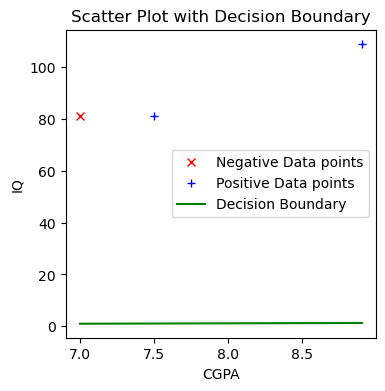

In [225]:
w0 = www[0]
w1 = www[1]
w2 = www[2]

x1 = np.linspace(db_df["cgpa"].min(), db_df["cgpa"].max(), 100)
# x2 = np.linspace(db_df["iq"].min(), db_df["iq"].max(), 100)
x2 = (- w0 - (w1 * x1)) / w2
# y = w0 + w1 * x1 + w2 * x2


# Plot the scatter plot
plt.figure(figsize=(4, 4))
plt.plot(db_df[db_df["placed"] == 0]["cgpa"], db_df[db_df["placed"] == 0]["iq"], "rx", label="Negative Data points")
plt.plot(db_df[db_df["placed"] == 1]["cgpa"], db_df[db_df["placed"] == 1]["iq"], "b+", label="Positive Data points")

# Plot the decision boundary
plt.plot(x1, x2, "g-", label="Decision Boundary")

# Add legend and show the plot
plt.legend()
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Scatter Plot with Decision Boundary")
plt.show()


In [226]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a linearly separable dataset
X, y = make_classification(n_samples=100,    # Number of samples
                            n_features=2,    # Number of features (2D)
                            n_informative=2, # Both features contribute to the output
                            n_redundant=0,   # No redundant features
                            n_clusters_per_class=1,  # One cluster per class
                            flip_y=0,        # No noise
                            random_state=42)
X.shape, y.shape

((100, 2), (100,))

In [227]:
www = fit(X, y)
www

array([[ 2.13963028],
       [-2.16802114],
       [ 4.01498626]])

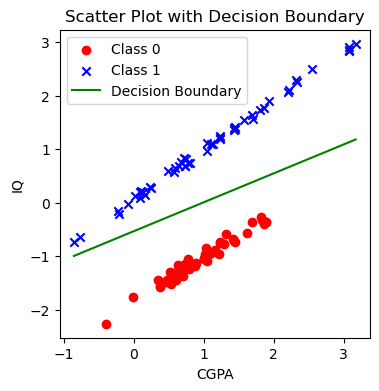

In [228]:
w0 = www[0]
w1 = www[1]
w2 = www[2]

x1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
# x2 = np.linspace(db_df["iq"].min(), db_df["iq"].max(), 100)
x2 = (- w0 - (w1 * x1)) / w2
# y = w0 + w1 * x1 + w2 * x2


# Plot the scatter plot
plt.figure(figsize=(4, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', marker='x')

# Plot the decision boundary
plt.plot(x1, x2, "g-", label="Decision Boundary")

# Add legend and show the plot
plt.legend()
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Scatter Plot with Decision Boundary")
plt.show()
